# **Logistic Regression Classifier on Wisconsin Breast Cancer Dataset**

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [0]:
data = pd.read_csv("Breast_Cancer.csv",header=0)

In [3]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


## **We wish to predict the diagonsis**

In [0]:
data.drop("Unnamed: 32",axis=1,inplace=True)
data.drop("id",axis=1,inplace=True)

**Check if we have missing data**

In [6]:
Missing_data=data.isna().sum()
Missing_data=Missing_data.to_frame()
Missing_data.columns=['Missing Values']
Missing_data.sort_values(by='Missing Values',ascending=False)

,Missing Values
diagnosis,0
compactness_se,0
symmetry_worst,0
concave points_worst,0
concavity_worst,0
compactness_worst,0
smoothness_worst,0
area_worst,0
perimeter_worst,0
texture_worst,0


**Convert Malignant Class 'M' to 1 and Benign Class 'B' to 0**
**. Visualize the class Distributions**

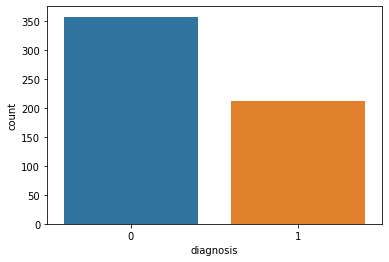

In [5]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
Output = data['diagnosis']


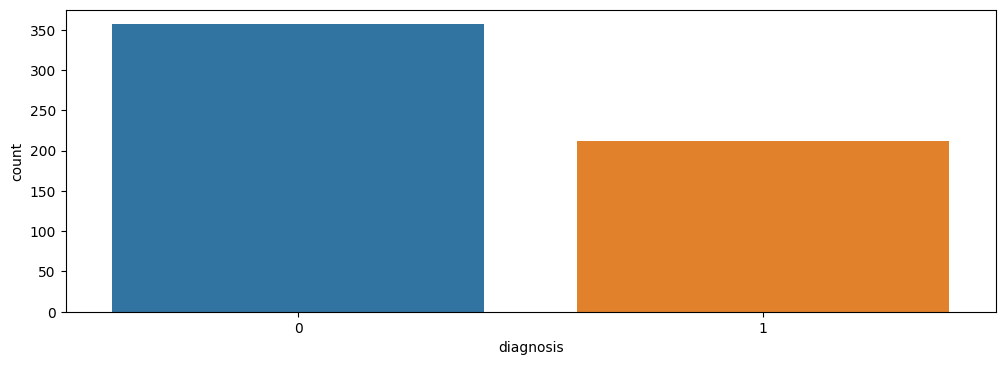

In [7]:
plt.figure(figsize=(12,4), dpi=100)
sns.countplot(data['diagnosis'],label="Count")


In [0]:
data.drop("diagnosis",axis=1,inplace=True)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,Output,test_size=0.25, random_state=2)

In [10]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


**Always scale the data for modles that calculate weights**

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [0]:
model_logit= LogisticRegression(solver='liblinear',random_state=2)


In [14]:
model_logit.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
prediction_logit_train=model_logit.predict(X_train)

**Get training accuracy**

In [16]:
metrics.accuracy_score(prediction_logit_train,Y_train)


0.9859154929577465

In [17]:
cm_train=confusion_matrix(Y_train, prediction_logit_train)
cm_train

array([[268,   2],
       [  4, 152]])

**Function to plot confusion matrix**

In [0]:
def plot_CM (clf,cm):
  plt.figure(figsize=(12,4), dpi=100)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.PuBu)
  classNames = ['Benign','Malignant']
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

**Training Confusion Matrix**
1. TN= TRUE NEGATIVE : Tumor is bening and Classifier predicts it as benign
2. FP = FALSE POSTIVE : Tumor is bening and Classifier predicts it as Malignant
3. FN = FALSE NEGATIVE:  Tumor is Malignant and Classifier predicts it as Benign
4. TP= TRUE POSITIVE:Tumor is Malignant and Classifier predicts it as Malignant 

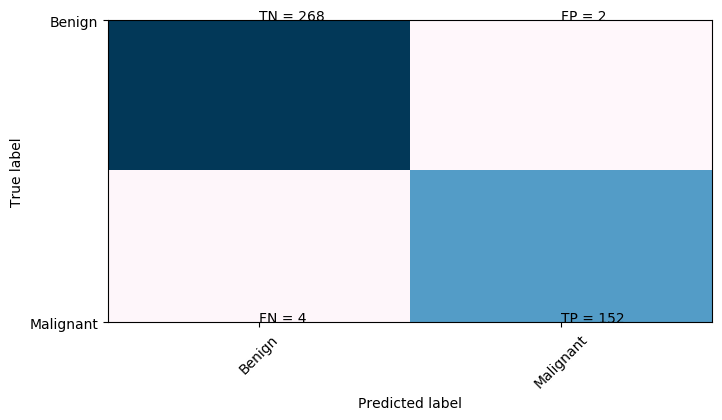

In [19]:
plot_CM (model_logit,cm_train)

**Get Testing Accuracy**

**Get the testing confusion matrix**

In [0]:
prediction_logit=model_logit.predict(X_test)
cm_test=confusion_matrix(Y_test, prediction_logit)

In [22]:
metrics.accuracy_score(prediction_logit,Y_test)


0.972027972027972

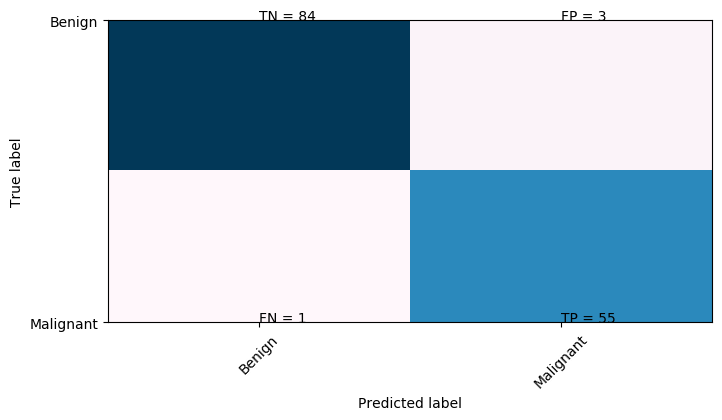

In [23]:
plot_CM (model_logit,cm_test)